In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

import warnings

%matplotlib inline

In [4]:
myData = pd.read_csv('./Unit_5_data/mycar.csv')

In [6]:
X = myData.iloc[:,:-1].values
Y = myData.iloc[:,1].values

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)

In [10]:
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_pred = myModel.predict(X_test)
y_pred

array([-1.38336391, 14.05885183, 56.52494512, 71.96716086, 29.50106757,
       48.80383725, 44.94328331, 60.38549905, 37.22217544, 48.80383725,
       52.66439118, 37.22217544, 29.50106757, 41.08272938, 37.22217544])

In [15]:
y_happy = [4,20,110,15,23]
y_happy_pred = [5,15,100,9,21]

In [18]:
#Вычисляем MAE:

MAE = metrics.mean_absolute_error(y_happy, y_happy_pred)
print(MAE)

4.8


In [17]:
#Вычисляем MSE:

MSE = metrics.mean_squared_error(y_happy, y_happy_pred)
print(MSE)

33.2


In [19]:
#Вычисляем коэффициент детерминации:

R_2 = metrics.r2_score(y_happy, y_happy_pred)
print(R_2)

0.9774247946472284


### Задание 3.3.1
Чему равна MSE на этих данных $F$ ?  
Предсказанное значение	1	3	2	5  
Истинное значение	2	3	-1	4

In [22]:
pred = [1, 3, 2, 5]
y = [2, 3, -1, 4]

MSE = metrics.mean_squared_error(pred, y)
MSE

2.75

### Задание 3.4.2
Найдите следующий шаг градиентного спуска. Текущая модель: $y=2x$.

Обучающая выборка:

 |x |y |
 |--|--| 
 |1 |2 |
 |2 |5 |
 
Темп обучения (learning rate):$1/6$ 
Ответ будет выглядеть как $y = kx + b$, где $k$ и $b$ вы считаете самостоятельно.

### Задание 3.4.5
Чему равен коэффициент детерминации на этих данных? Укажите число с точностью до сотых:

| | | | | |
|-----------------------|-|-|--|-|
|Предсказанное значение	|1|3|2 |5|
|Истинное значение	    |2|3|-1|4|

In [1]:
y_hat = pd.Series([1,3,2,5])
y = pd.Series([2,3,-1,4])

NameError: name 'pd' is not defined

In [13]:
ss_res = np.square(y_hat - y).sum()
ss_tot = np.square(y - y.mean()).sum()

In [14]:
R_2 = 1 - ss_res/ss_tot
round(R_2,2)

0.21

### -----------------------------------------------------------------------------------------------

## 5 Линейная регрессия. Предобработка

В предыдущем модуле мы сделали предобработку данных о квартирах, выставленных на продажу.

Теперь эти данные готовы для построения регрессионной модели. Попробуем предсказать цену на квартиры с помощью нескольких признаков квартиры.

In [3]:
data = pd.read_csv('./Unit_5_data/data_flats_200830.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


Но для начала освежим в памяти все этапы предобработки.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_education_raion               30469 non-null int64
culture_objects_top_25_raion             30469 non-null int64
shopping_centers_raion                   30469 non-null int64
metro_km_walk                            30444 non-null float64
kindergarten_km                          30469 non-null float64
school_km      

Что мы можем увидеть по нему? Что у нас есть 20 признаков. Один из них — id, не несет смысловой нагрузки. А один из признаков — наша независимая переменная, которую мы и будем предсказывать. Это цена квартиры (price_doc).

Мы точно можем видеть, что у нас есть пропуски, так как количество наблюдений разное у разных переменных и отличается для некоторых признаков от количества объектов.

Также количество пропусков для каждого признака можно посмотреть следующим образом:

In [5]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

Или можно оценить визульно количество пропусков и их распределение:

Получаем следующую картинку:

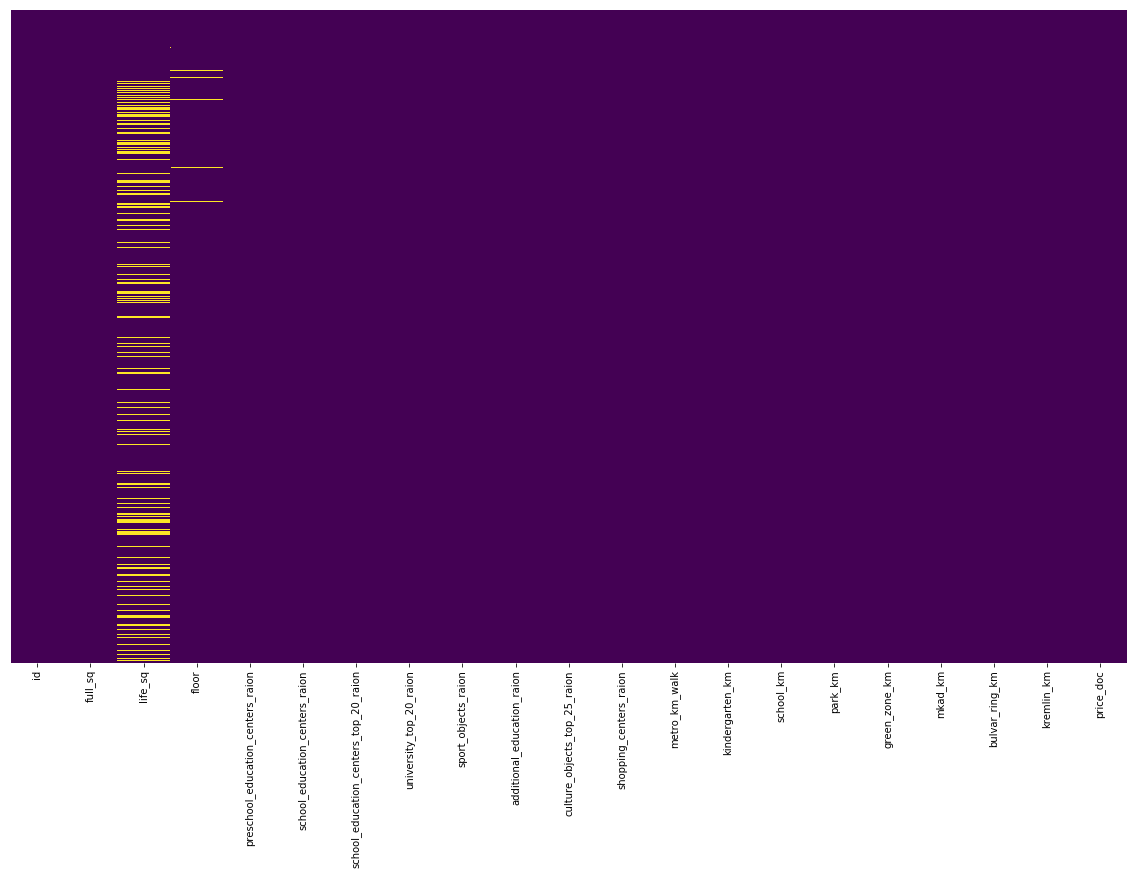

In [6]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Здесь фиолетовым показаны заполненные ячейки, а желтым — пропущенные значения. Благодаря этому мы можем сразу оценить количество пропусков и посмотреть, в каких переменных они встречаются. Если пропуски встречаются в большом количестве только в нескольких переменных, которые не являются для нас важными, можно их удалить.

У нас пропуски по сути есть только в одном признаке — жилой площади. Просто не будем брать её в модель.

Далее всегда есть смысл посмотреть на распределение нашей целевой переменной и понять, какие значения мы будем предсказывать:

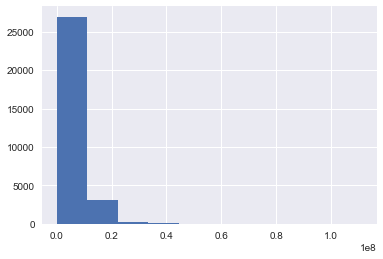

In [9]:
data.price_doc.hist();

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

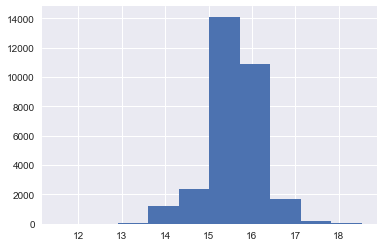

In [10]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

Отлично, выглядит уже лучше!

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

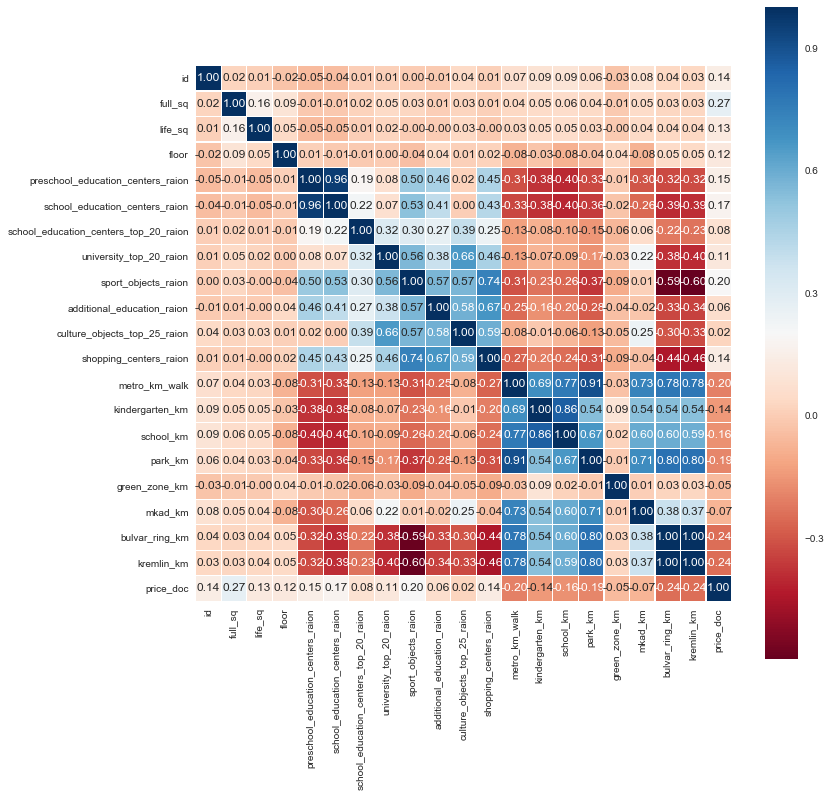

In [11]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

Смотрим, у каких пар признаков сильная взаимосвязь:

Количество школ и количество детских садов. Довольно логично, так как в Москве детские сады обычно присоединены к школам. Оставляем школы, т.к. у этого признака больше взаимосвязь с целевой переменной.

Расстояние до школ и расстояние до детских садов. По сути, это естественным образом вытекает из предыдущего пункта. Оставляем расстояние до школ.  

Расстояние до парка и до метро. Рассуждая аналогично предыдущим парам, оставляем расстояние до метро.

Расстояние до Кремля и до бульварного кольца. У них коэффициент корреляции равен 1, и их корреляция с целевой переменной одинаковая. Поэтому можем убрать любой признак. Убираем расстояние до Кремля.  

Итак, нам надо убрать пять признаков (четыре из-за мультиколлинеарности и жилую площадь, так как там много пропусков), остальные оставляем. Теперь наши данные готовы к построению регрессионной модели.

### Задание 3.5.1
Удалите строки, где есть хотя бы один пропуск. Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77.  
- Нормализуйте отобранные признаки для тестовой и для обучающей выборки **отдельно(!)** с помощью функции `RobustScaler()` (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам).   
- Вычислите MSE , ответ запишите с точностью до сотых.   
- Не забудьте, что `id` не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора! 
- Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти экспоненциальную функцию от $y$! Округлите ответ до целых.

Смотрим, у каких пар признаков сильная взаимосвязь:

- Количество школ и количество детских садов. Довольно логично, так как в Москве детские сады обычно присоединены к школам. Оставляем школы, т.к. у этого признака больше взаимосвязь с целевой переменной.
- Расстояние до школ и расстояние до детских садов. По сути, это естественным образом вытекает из предыдущего пункта. Оставляем расстояние до школ.
- Расстояние до парка и до метро. Рассуждая аналогично предыдущим парам, оставляем расстояние до метро.
- Расстояние до Кремля и до бульварного кольца. У них коэффициент корреляции равен 1, и их корреляция с целевой переменной одинаковая. Поэтому можем убрать любой признак. Убираем расстояние до Кремля.

Итак, нам надо убрать пять признаков (четыре из-за мультиколлинеарности и жилую площадь, так как там много пропусков), остальные оставляем. Теперь наши данные готовы к построению регрессионной модели.

In [8]:
data = pd.read_csv('./Unit_5_data/data_flats_200830.csv', sep =';')

data.price_doc = data.price_doc.apply(lambda x: np.log(x + 1))

data = data.drop(columns=['id','life_sq','preschool_education_centers_raion',
                       'kindergarten_km', 'park_km', 'kremlin_km'])

data.dropna(axis=0, inplace=True)

y = data.price_doc
X = data.drop(columns='price_doc')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

MSE = mean_squared_error(y_pred,y_test)
print(round(MSE))

16647931507747.0


## 3A.6. Линейная регрессия. Практика №1

In [4]:
from sklearn.datasets import load_boston

In [5]:
data = load_boston()

In [6]:
X, y = data['data'], data['target']

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

### Задание 3.6.1
Реализуйте матричную линейную регрессию. Какой получился RMSE?
Ответ округлите до сотых. Пример ввода: 5.55.

In [7]:
def linreg_linear(X, y):
    theta = np.linalg.inv(X.T@X) @ X.T @ y
    return theta

In [8]:
theta = linreg_linear(X, y)

In [9]:
y_pr = X @ theta

In [10]:
RMSE = np.sqrt(metrics.mean_squared_error(y,y_pr))
round(RMSE,2)

4.68

### Задание 3.6.2
Постройте модель при помощи sklearn. Используйте параметры по умолчанию, обучите на всей выборке и посчитайте RMSE.
Ответ округлите до сотых. Пример ввода: 5.55.

In [11]:
model = LinearRegression()

In [12]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_pr = model.predict(X)

In [14]:
RMSE = np.sqrt(metrics.mean_squared_error(y,y_pr))
round(RMSE,2)

4.68

### Задание 3.6.3
У какого из признаков наибольшее стандартное отклонение? Чему оно равно?

Ответ округлите до сотых. Пример ввода: 5.55.

In [15]:
round(X.std(axis=0).max(),2)

168.37

### Задание 3.6.4
Обучите регрессию без дополнительного столбца единиц. Какой получился RMSE?
Ответ округлите до сотых. Пример ввода: 5.55.

In [16]:
X, y = data['data'], data['target']

model.fit(X,y)
y_pr = model.predict(X)

RMSE = np.sqrt(metrics.mean_squared_error(y,y_pr))
round(RMSE,2)

4.68

### Задание 3.6.5
Очистите данные от строк, где значение признака $B$ меньше $50$. Какой получился RMSE?
Ответ округлите до сотых. Пример ввода: 5.55.

In [108]:
print(data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [18]:
X, y = data['data'], data['target']
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [19]:
maska = (X[:,12] > 50)

In [20]:
X_filtred, y_filtred = X[maska,:], y[maska]

In [21]:
model.fit(X_filtred,y_filtred)
y_pr = model.predict(X_filtred)

RMSE = np.sqrt(metrics.mean_squared_error(y_filtred,y_pr))
round(RMSE,2)

4.67

### Задание 3.6.6
Нормализуйте признаки и обучите линейную регрессию матричным методом. Какой получился RMSE?
Ответ округлите до сотых. Пример ввода: 5.55.

In [22]:
X, y = data['data'], data['target']
X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [23]:
theta = linreg_linear(X, y)

y_pr = X @ theta

RMSE = np.sqrt(metrics.mean_squared_error(y,y_pr))
round(RMSE,2)

4.68

### Задание 3.7.1
Сделайте для градиентного спуска остановку алгоритма, если максимальное из абсолютных значений компонент градиента становится меньше $0.01$. Сравните скорость обучения градиентным спуском и матричными операциями.

На какой итерации останавливается градиентный спуск?

In [ ]:
def prepare_boston_data():
    data = load_boston()
    X, y = data['data'], data['target']
    # Нормализовать даннные с помощью стандартной нормализации
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

Решение офрмленное просто - функциями

In [61]:
def calc_mse_gradient(X, y, theta):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(X.dot(theta) - y)
    
    return grad

def gradient_step(theta, theta_grad, alpha):
    return theta - alpha * theta_grad

def optimize(X, y, grad_func, start_theta, alpha, n_iters):
    theta = start_theta.copy()
    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)
    
    return theta

def optimize_tres(X, y, grad_func, start_theta, alpha, treshold, n_iters = 1000):
    theta = start_theta.copy()
    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)
        if abs(theta_grad).max() < treshold: break
    return theta, i

In [49]:
%%timeit

m = X.shape[1]
alpha = 0.2
treshold = 0.01

theta, n_iter = optimize_tres(X, y, calc_mse_gradient, np.ones(m), alpha, treshold, n_iters = 10000)

7.47 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Решение "завернутое" в класс

In [100]:
class RegOptimizer_tres():
    def __init__(self, alpha, treshold, n_iters = 1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
        self._treshold = treshold
    
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    
    def grad_func(self, X, y, theta):
        raise NotImplementedError()

    def optimize(self, X, y, start_theta, treshold, n_iters):
        theta = start_theta.copy()

        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
            if abs(theta_grad).max() < treshold: break
        return theta, i 
    
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta, iters_num = self.optimize(X, y, start_theta, self._treshold , self._n_iters)
        return iters_num
        
    def predict(self, X):
        raise NotImplementedError()

In [101]:
class LinReg(RegOptimizer_tres):
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(X.dot(theta) - y)

        return grad
    
    def predict(self, X):
        if self.theta is None:
            raise Exception('You should train the model first')
        
        y_pred = X.dot(self.theta)
        
        return y_pred

In [107]:
%%timeit

linreg_grad = LinReg(0.2, 0.01)
linreg_grad.fit(X, y)

8.36 ms ± 677 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [105]:
n_iter_grad = linreg_grad.fit(X, y)

In [106]:
n_iter, n_iter_grad

(212, 212)

Матричное решение через класс:

In [110]:
class LinRegAlgebra():
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y):
        self.theta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    def predict(self, X):
        return X.dot(self.theta)

In [111]:
linreg_alg = LinRegAlgebra()

In [112]:
%%timeit
linreg_alg.fit(X, y)

93 µs ± 6.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Задание 3.7.2
Добавьте к признакам нелинейной модели квадрат признака DIS и переобучите модель. Какой получился RMSE? Подсказка: используйте написанную нами линейную регрессию методом матричных операций.
Ответ округлите до сотых. Пример ввода: 5.55.

In [122]:
def prepare_boston_data_new2():
    data = load_boston()
    X, y = data['data'], data['target']
    
    X = np.hstack([X, np.sqrt(X[:, 5:6]), X[:, 6:7] ** 3, X[:, 7:8] ** 2])
    # Нормализовать даннные с помощью стандартной нормализации
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [128]:
def print_regression_metrics(y_true, y_pred):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

def train_validate(X, y):
    # Разбить данные на train/valid
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

    # Создать и обучить линейную регрессию
    linreg_alg = LinRegAlgebra()
    linreg_alg.fit(X_train, y_train)

    # Сделать предсказания по валидционной выборке
    y_pred = linreg_alg.predict(X_valid)

    # Посчитать значение ошибок MSE и RMSE для валидационных данных
    print_regression_metrics(y_valid, y_pred)

In [129]:
X, y = prepare_boston_data_new2()

train_validate(X, y)

MSE = 13.58, RMSE = 3.68


### Задание 3.7.3
Уберите нормализацию и оставьте добавленные признаки на основе RM и AGE. Какой получился RMSE?
Ответ округлите до сотых. Пример ввода: 5.55.

In [132]:
def prepare_boston_data_new3():
    data = load_boston()
    X, y = data['data'], data['target']
    
    X = np.hstack([X, np.sqrt(X[:, 5:6]), X[:, 6:7] ** 3])
    # Нормализовать даннные с помощью стандартной нормализации
#     X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [134]:
X, y = prepare_boston_data_new3()

train_validate(X, y)

MSE = 14.27, RMSE = 3.78
